# Lab04 Tips

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
from matplotlib import ticker
from gofer.ok import check # This line loads the tests.
import os
user = os.getenv('JUPYTERHUB_USER')
import EDS

## Using ptrend
Data tables don't handle dates well, so the course has its own module EDS (Elements of Data Science). This module includes the function ptrend.

Load a date set with a date column.

In [4]:
nobel = Table().read_table('ChemBioNobelTrend.csv')
nobel.show(3)

Week,Chemistry: (United States),Biology: (United States),Nobel Prize: (United States)
2019-02-03,42,40,4
2019-02-10,42,38,5
2019-02-17,36,33,6


In [5]:
help(EDS.ptrend)

Help on function ptrend in module EDS:

ptrend(tbl, datec, datac, mult=1.0, fmtdate='%b-%Y')
    Takes Datascience Table and plots time trend, returns number of days



We see from the help that the function has three required parameters and two optional keyword parameters.
Required:
- table name
- label of column with date/time information
- label of column to be plotted vs. time

1813.0

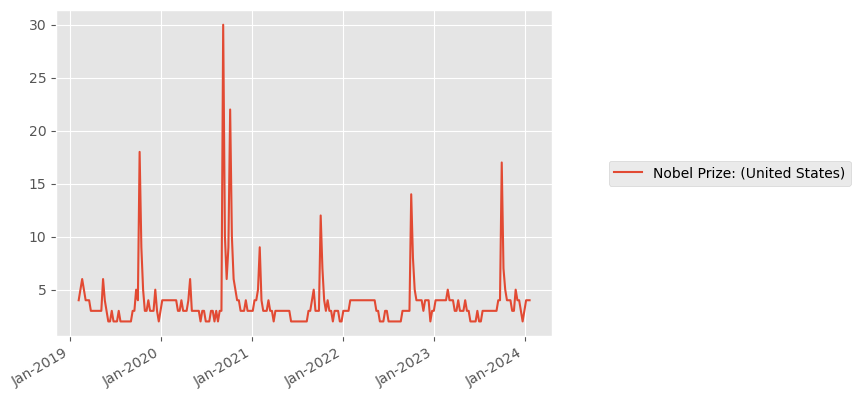

In [7]:
EDS.ptrend(nobel, "Week", "Nobel Prize: (United States)")

## Checking if the denominator is zero, using if-else
The lab current suggest using

```python
if z != z:  # if conditional statement
    z = 0
```
I think this is very confusing. Instead, I suggest the approach below.

In [9]:
# Now your function...
def ratio(x1, x2):
    """ Computes a ratio of x1 to x2 """
    if x2==0:  # if conditional statement
        z = 0
    else:
        z = x1/x2
    r = to_percentage(z)
    return r

How does this function work. The tricky part is the if-else contruct. So let's learn it. Let's star with a simple if statement.

In [10]:
a = 4
b = 3

if a > b:
    print("a is greater than b")
    print("Somehow that makes me happy!")

a is greater than b


Notice the we start with `if` then a condition that is either True or False, then a colon

If the condition is True, the indented statments are executed; if is False they are skipped. Try it!

Just as with functions, the end of the indentation is the end of the construct.

In [11]:
a = 4
b = 3

if a > b:
    print("a is greater than b")
    print("Somehow that makes me happy!")
else:
    print("Now I'm sad...")

a is greater than b
Somehow that makes me happy!


With the addition of and `else:` clause if the condition is False the indented statements after the else are executed.
Try running the cell above with a less than b. (If it doesn't make you too sad.)

No go back and look at the function I provided. It takes in two parameters, the numerator x1 and the denominator x2. If check if the denominator is zero because you cannot divide by zero. If it is zero, it sets the ratio, `z`, to zero, otherwise it sets z to x1/x2.

**Make sense?**

### If-elif-else
Conditions can be more complicated if you and in if, else-if (abbreviated elif) along with else.

Try different values of `a` in the cell below to convince yourself you understand how this works.

In [12]:
a = 0

if a > 0:
    print("a is greater than zero")
elif a < 0:
    print("a is less than zero")
else:
    print("a is equal to zero")

a is equal to zero


## Applying a function to a create a new column in a table.

Let's saw we are interested adding a column to our `nobel` table that is tje sum of the chemistry and biology.

Step 1: Create a function
Step 2: Test the function
Step 3: Apply the function to the table to create the new column

There are already functions for summing, but let's create one anyway, to illustrate the process.

In [15]:
# Step 1: Create a function
def sum_two_numbers(x, y):
    return x + y

In [16]:
# Step 2: Test the function

sum_two_numbers(5, 9)

14

In [17]:
# Step 3: Apply the function to the table to create the new column

nobel = nobel.with_column('Chem + Bio', nobel.apply(sum_two_numbers, 'Chemistry: (United States)', 'Biology: (United States)'))
nobel.show(3)                                   

Week,Chemistry: (United States),Biology: (United States),Nobel Prize: (United States),Chem + Bio
2019-02-03,42,40,4,82
2019-02-10,42,38,5,80
2019-02-17,36,33,6,69


## Explanation

`nobel.with_column` expects three parameters:
- a table
- a label for the new column
- an array to fill the new column
- It returns a new table with the column added.

`.apply` is a table method that expect two or more parameters
- a function to be applied to columns in the table
- which columns to use an arguments to that function
- it returns the array that results from applying the function to every row in the table

**Look again at the Step 3 cell to be sure you understand.**